# **Bank customer Exit Clasification Using Artificial Neural Network(ANN)**

<img src="1.png" alt="alternative_text" width="500" height="500" >

#### In This Project we will used the bank customer churn dataset  and training the Artificial Neural Network(ANN)

## **Following are The Project Overview:**
<h3>Exploratry Data Anlysis(EDA)</h3>
<B>
<ol>
  <li>Importing libries</li>
  <li>Load Data</li>
  <li>Collecting Basic Information About The DataSet</li>
  <li>Removeing Duplicate Rows</li>
  <li>Detecting the Outliers and Manage them</li>
  <li>Finding The Missing Value and Manage them</li>
</ol>
 </B>
    
<h3>Apply Deep Learing Tecnique</h3>
<B>
<ol>
  <li>Importing libries</li>
  <li>Setting Up Hyper-Parameter</li>
  <li>Buliding Artificial Neural Network(ANN)</li>
  <li>Training Model</li>
  <li>Predict From the Model </li>
  <li>Finding accuracy of Your Modle</li>
  <li>Report</li>
</ol>
</B>

# **What is Our DataSet?**

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

**1. Customer ID:**     A unique identifier for each customer<br>
**2. Surname:**         The customer's surname or last name<br>
**3. Credit Score:** A numerical value representing the customer's credit score<br>
**4. Geography:** The country where the customer resides (France, Spain or Germany)<br>
**5. Gender:** The customer's gender (Male or Female)<br>
**6. Age:** The customer's age.<br>
**7. Tenure:** The number of years the customer has been with the bank<br>
**8. Balance:** The customer's account balance<br>
**9. NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)<br>
**10. HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)<br>
**11. IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)<br>
**12. EstimatedSalary:** The estimated salary of the customer<br>
**13. Exited:** Whether the customer has churned (1 = yes, 0 = no)

================================================================================================================

# **Exploratry Data Anlysis(EDA)**

### **Importing libries**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

### **Load Data**

In [12]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


### **Collecting Basic Information About The DataSet**

In [14]:
data.shape

(10002, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### **Removeing Duplicate Rows**

In [17]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999      True
10000    False
10001     True
Length: 10002, dtype: bool

In [18]:
data.shape

(10002, 14)

In [19]:
list=data[data.duplicated()].index
list

Index([9999, 10001], dtype='int64')

In [20]:
type(list)

pandas.core.indexes.base.Index

In [21]:
list=list.to_list()
list

[9999, 10001]

In [22]:
data.drop(list,axis=0,inplace=True)

In [23]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [24]:
data["Exited"]=data["Exited"].astype("category")
data["Exited"]

0        1
1        0
2        1
3        0
4        0
        ..
9995     0
9996     0
9997     1
9998     1
10000    0
Name: Exited, Length: 10000, dtype: category
Categories (2, int64): [0, 1]

In [25]:
exited_counts = data['Exited'].value_counts()
print(exited_counts)


Exited
0    7963
1    2037
Name: count, dtype: int64


In [26]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [27]:
data.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [28]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


### **Encoded catagorical Features**

In [30]:

data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)

In [31]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,False,False,True
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,False,False,True
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,False,False,False
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True


In [32]:
data.replace({False: 0, True: 1}, inplace=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_24848\2918697156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({False: 0, True: 1}, inplace=True)


In [33]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,0,0,1
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,0,0,1
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,0,0,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1,0,1


In [34]:
data["Geography_Germany"].value_counts()

Geography_Germany
0    7491
1    2509
Name: count, dtype: int64

In [35]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### **Now Defining the Input and Target features**

In [39]:
X=data.drop(columns="Exited")
Y=data["Exited"]

In [41]:
X.shape,Y.shape

((10000, 11), (10000,))

In [43]:
Y=Y.astype("int")
Y.dtype

dtype('int32')

### **Now Do Train Test Spliting**

In [46]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    random_state=101,  # Seed for reproducibility
    test_size=0.20,    # 20% of the data for testing
    stratify=Y         # Stratify based on target variable Y
)

# Print shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


### **Now Scaled the Input data**

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
Standar_Scaler=StandardScaler()

In [54]:
Scaled_x_train=Standar_Scaler.fit_transform(X_train)
Scaled_X_test=Standar_Scaler.transform(X_test)


In [56]:
Scaled_x_train.shape

(8000, 11)

In [58]:
Scaled_X_test.shape

(2000, 11)

In [60]:
Scaled_x_train=pd.DataFrame(Scaled_x_train,columns=X_train.columns)
Scaled_x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.156269,-0.660192,1.731346,-1.222082,-0.913425,0.641293,0.971040,-1.354548,-0.577350,1.747781,-1.081838
1,-0.906463,-0.564850,1.037802,0.262067,0.799917,0.641293,-1.029823,-1.722644,1.732051,-0.572154,0.924352
2,-1.143772,-0.088140,1.037802,0.097863,-0.913425,0.641293,-1.029823,-1.517650,1.732051,-0.572154,-1.081838
3,-1.494577,0.960622,0.691030,0.059321,-0.913425,-1.559351,-1.029823,0.608325,-0.577350,-0.572154,0.924352
4,-0.256442,-0.278824,1.384574,0.516533,2.513259,0.641293,-1.029823,0.584422,-0.577350,-0.572154,0.924352
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.060404,-1.422928,1.037802,0.263691,-0.913425,0.641293,-1.029823,-1.120986,-0.577350,-0.572154,-1.081838
7996,-0.648518,0.579254,1.037802,0.939943,-0.913425,0.641293,0.971040,0.401565,1.732051,-0.572154,-1.081838
7997,0.672159,-0.469508,-0.349286,0.769098,-0.913425,-1.559351,-1.029823,-0.043057,-0.577350,-0.572154,0.924352
7998,1.188048,0.102544,0.344258,0.988841,-0.913425,0.641293,0.971040,-0.562293,-0.577350,-0.572154,0.924352


In [62]:
Scaled_x_train.describe().round(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,8000.0,7999.0,8000.0,8000.0,8000.0,7999.0,7999.0,8000.0,8000.0,8000.0,8000.0
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.1,-2.0,-1.7,-1.2,-0.9,-1.6,-1.0,-1.7,-0.6,-0.6,-1.1
25%,-0.7,-0.7,-0.7,-1.2,-0.9,-1.6,-1.0,-0.9,-0.6,-0.6,-1.1
50%,0.0,-0.2,-0.0,0.3,-0.9,0.6,1.0,0.0,-0.6,-0.6,0.9
75%,0.7,0.5,0.7,0.8,0.8,0.6,1.0,0.9,0.0,-0.6,0.9
max,2.1,5.1,1.7,2.3,4.2,0.6,1.0,1.7,1.7,1.7,0.9


In [64]:
Scaled_X_test=pd.DataFrame(Scaled_X_test,columns=X_test.columns)
Scaled_X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.414214,-0.088140,-1.389602,0.290847,0.799917,-1.559351,0.971040,-0.787654,-0.577350,-0.572154,0.924352
1,1.487264,-0.755534,-1.736375,1.098508,0.799917,-1.559351,0.971040,1.313112,-0.577350,1.747781,0.924352
2,0.063409,-0.469508,0.344258,-0.263009,-0.913425,0.641293,-1.029823,-1.501814,-0.577350,1.747781,-1.081838
3,-0.101675,0.293228,-0.002514,1.598548,-0.913425,0.641293,0.971040,-1.599840,-0.577350,-0.572154,-1.081838
4,-0.101675,-0.755534,1.731346,0.677782,-0.913425,0.641293,-1.029823,1.188160,1.732051,-0.572154,-1.081838
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.937416,1.246648,-1.042830,-1.222082,-0.913425,0.641293,-1.029823,0.500917,-0.577350,-0.572154,0.924352
1996,-0.349302,-0.755534,1.037802,-1.222082,-0.913425,-1.559351,0.971040,-0.414525,-0.577350,-0.572154,-1.081838
1997,0.930103,-0.564850,-1.389602,0.853358,-0.913425,0.641293,0.971040,0.401405,-0.577350,-0.572154,0.924352
1998,-0.916780,-0.183482,-1.389602,0.386748,0.799917,-1.559351,0.971040,0.025062,-0.577350,-0.572154,0.924352


In [66]:
Scaled_X_test.describe().round(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.1
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.1,-2.0,-1.7,-1.2,-0.9,-1.6,-1.0,-1.7,-0.6,-0.6,-1.1
25%,-0.6,-0.7,-1.0,-1.2,-0.9,-1.6,-1.0,-0.9,-0.6,-0.6,-1.1
50%,0.0,-0.2,-0.0,0.3,-0.9,0.6,1.0,-0.0,-0.6,-0.6,0.9
75%,0.7,0.5,1.0,0.8,0.8,0.6,1.0,0.8,1.7,1.7,0.9
max,2.1,5.1,1.7,2.8,4.2,0.6,1.0,1.7,1.7,1.7,0.9


### **Now That this The final Data Which were Ready for the Training Model**

In [69]:
# Print shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


# **Apply Deep Learing Tecnique**

### **Importing libries**

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### **Setting Up Hyper-Parameter**

In [102]:
# Number of features in the input data
input_size = 11

# Number of samples processed in each training iteration
batch_size = 200

# Number of neurons in the first hidden layer
hidden_layer1 = 100

# Number of neurons in the second hidden layer
hidden_layer2 = 50


# Number of neurons in the third hidden layer
hidden_layer3 = 20

# Number of neurons in the output layer (typically for binary classification)
output_layer = 1


### **Buliding Artificial Neural Network(ANN)**


<img src="https://blogs.rstudio.com/ai/posts/2018-01-11-keras-customer-churn/images/Artificial-Neural-Network-Architecture.jpg" alt="alternative_text" width="500" height="500" >

In [104]:
def get_model(input_size, hidden_layer1, hidden_layer2, output_layer,hidden_layer3):
    # Initialize the Sequential model
    model = Sequential()

    # Add the first hidden layer
    model.add(Dense(hidden_layer1, input_dim=input_size, activation="relu"))

    # Add the second hidden layer
    model.add(Dense(hidden_layer2, activation="relu"))

    # Add the third hidden layer
    model.add(Dense(hidden_layer3, activation="relu"))

    # Add the output layer
    model.add(Dense(output_layer, activation="sigmoid"))  # Use 'sigmoid' for binary classification

    return model




In [132]:
ANN_Model=get_model(input_size, hidden_layer1, hidden_layer2, output_layer,hidden_layer3)


D:\setups\ancondaInstall\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
ANN_Model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,291 (28.48 KB)

 Trainable params: 7,291 (28.48 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
ANN_Model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

### **Training Model**


<img src="https://elitedatascience.com/wp-content/uploads/2018/05/Model-Training-Feature.jpg" alt="alternative_text" width="500" height="500" >

In [138]:
from time import time

# Record the start time
start_time = time()

# Train the model
History=ANN_Model.fit(
    Scaled_x_train,   # Training features (scaled data)
    y_train,          # Training labels
    batch_size=batch_size,   # Number of samples per gradient update
    epochs=30,        # Number of times the entire dataset is passed through the model
    verbose=1,        # Verbosity mode (1 means progress bar will be shown)
    validation_split=0.2  # Fraction of training data to be used for validation
)

# Record the end time
end_time = time()

# Print the total execution time
print(f"Total Execution Time is: {end_time - start_time} seconds")


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5953 - loss: 0.6765 - val_accuracy: 0.7962 - val_loss: 0.6356
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8056 - loss: 0.6160 - val_accuracy: 0.7962 - val_loss: 0.5659
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7964 - loss: 0.5510 - val_accuracy: 0.7962 - val_loss: 0.5168
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.5077 - val_accuracy: 0.7962 - val_loss: 0.5058
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7937 - loss: 0.5091 - val_accuracy: 0.7962 - val_loss: 0.5056
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8028 - loss: 0.4966 - val_accuracy: 0.7962 - val_loss: 0.5056
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8024 - loss: 0.4971 - val_accuracy: 0.7962 - val_loss: 0.5056
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.5040 - val_accuracy: 0.7962 - val_loss

In [142]:
History.history

{'accuracy': [0.7229687571525574,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853,
  0.7962499856948853],
 'loss': [0.6407433152198792,
  0.6023526191711426,
  0.5396653413772583,
  0.5097824335098267,
  0.5055756568908691,
  0.5056749582290649,
  0.5056029558181763,
  0.5055825710296631,
  0.5056468844413757,
  0.5056013464927673,
  0.5057551860809326,
  0.5055797100067139,
  0.5055971741676331,
  0.5057100057601929,
  0.5055303

# **Model Training Graphical Visualization**

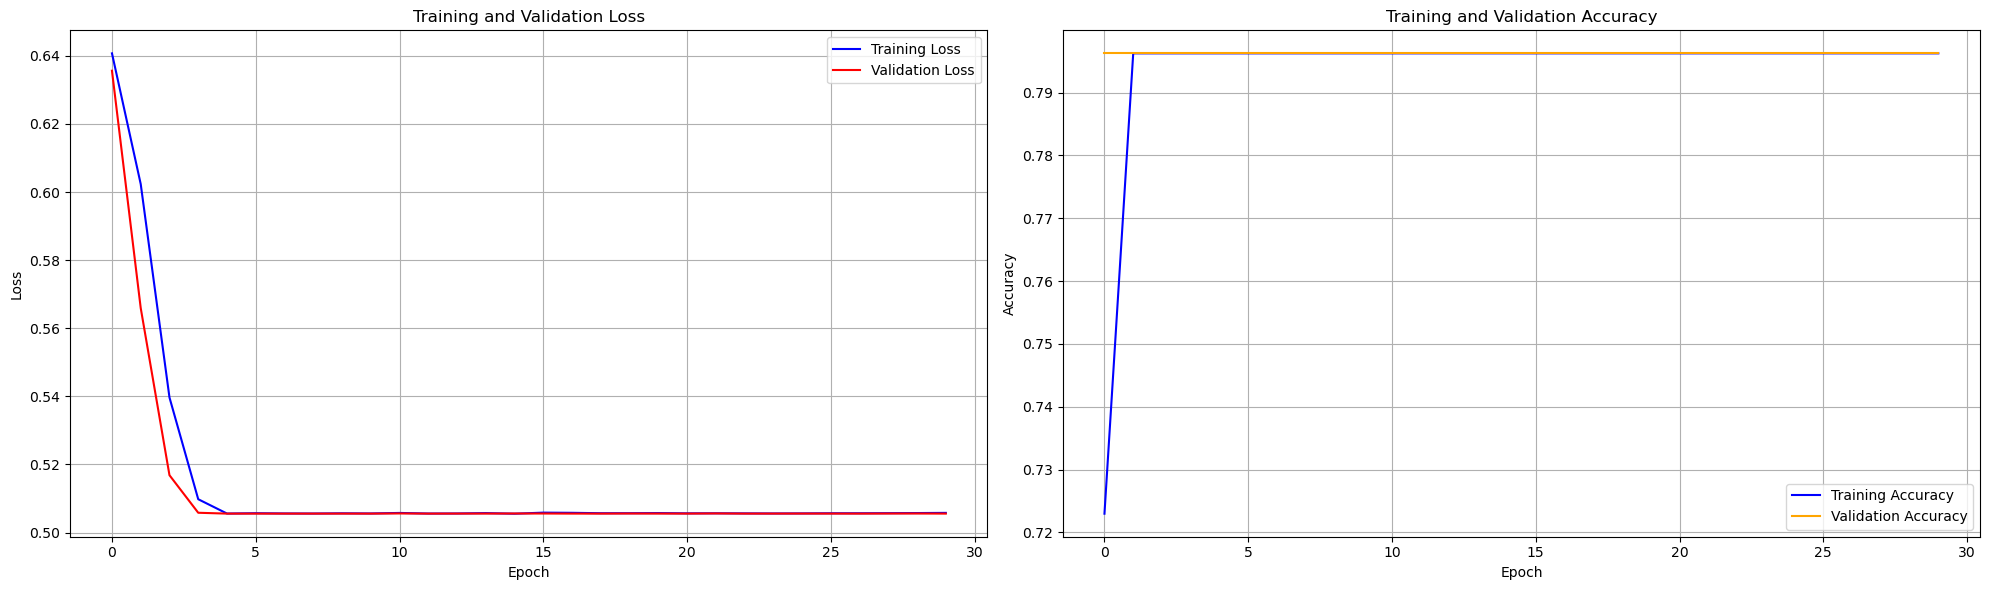

In [171]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
plot_training_history(History)


# **Predicting from The Model** 



<img src="2.png" alt="alternative_text" width="500" height="500" >

In [183]:
prdication =ANN_Model.predict(Scaled_X_test)
prdication

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.20372097],
       [0.20372097],
       [0.20372097],
       ...,
       [0.20372097],
       [0.20372097],
       [0.20372097]], dtype=float32)

In [191]:
prdication=np.where(prdication>0.5,1,0)

In [193]:
prdication

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# **Comparison Side by side**

In [196]:
p=pd.DataFrame(prdication)
p

,0
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [202]:
p.rename(columns={0:"Predication Values"},inplace=True)

In [212]:
yy=pd.DataFrame(y_test).reset_index()
yy.drop(columns="index",inplace=True,axis=1)

In [216]:
yy.rename(columns={"Exited":"Actual values"},inplace=True)

In [218]:
yy

,Actual values
0,0
1,0
2,1
3,0
4,0
...,...
1995,1
1996,0
1997,0
1998,0


In [220]:
Camparsion=pd.concat([yy,p],axis=1)
Camparsion

,Actual values,Predication Values
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1995,1,0
1996,0,0
1997,0,0
1998,0,0


### **Model Evaluation**

In [233]:
Test_accuracy=accuracy_score(y_test,prdication)
print(f"Test accuracy : {round(Test_accuracy*100,1)}%")

Test accuracy : 79.7%


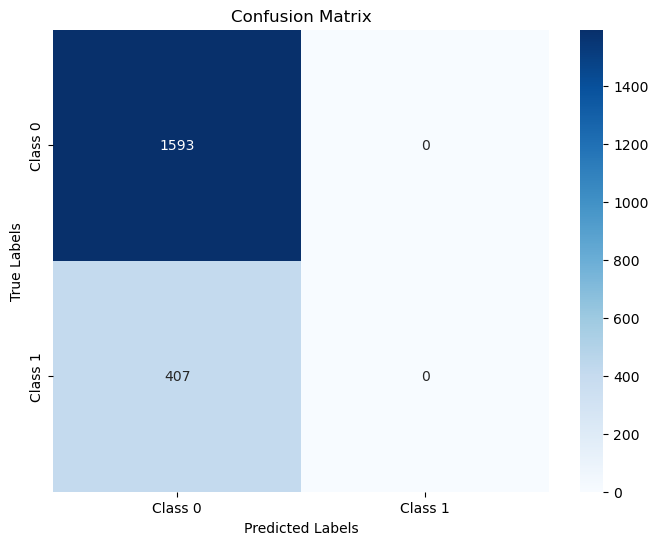

In [235]:

# Compute confusion matrix
cm = confusion_matrix(y_test, prdication)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()